In [1]:
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_hub
import numpy as np

2024-03-13 12:06:31.768525: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-13 12:06:33.690396: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-13 12:06:38.486153: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-13 12:07:06.069946: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
content_image="/media/borno/SOFTWERE AND BOOKS/super resolution and style transfer app/perso_image.jpg"
style_image='/media/borno/SOFTWERE AND BOOKS/super resolution and style transfer app/im.jpg'

In [3]:
# Load content and style images (see example in the attached colab).
content_image = plt.imread(content_image)
style_image = plt.imread(style_image)
# Convert to float32 numpy array, add batch dimension, and normalize to range [0, 1]. Example using numpy:
content_image = content_image.astype(np.float32)[np.newaxis, ...] / 255.
print(content_image.shape)
style_image = style_image.astype(np.float32)[np.newaxis, ...] / 255.
print(style_image.shape)
# Optionally resize the images. It is recommended that the style image is about
# 256 pixels (this size was used when training the style transfer network).
# The content image can be any size.
style_image = tf.image.resize(style_image, (256, 256))
print(content_image.dtype,style_image.dtype)

# Load image stylization module.
hub_module = tensorflow_hub.load('https://www.kaggle.com/models/google/arbitrary-image-stylization-v1/frameworks/TensorFlow1/variations/256/versions/2')

# Stylize image.
outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]

(1, 360, 540, 3)
(1, 360, 639, 3)
float32 <dtype: 'float32'>


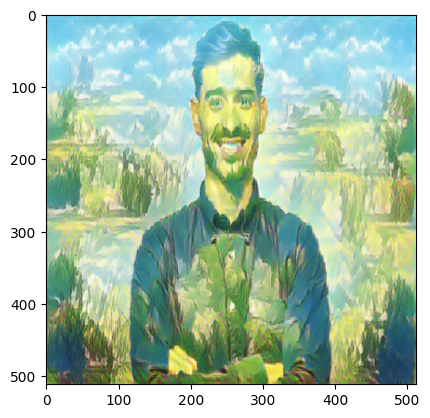

In [9]:
plt.imshow(tf.image.resize(stylized_image[0],(512,512)))